# SIMPLE FACE DETECTION WITH OPENCV AND PYTHON

### DESCRIPTION :
This program will explain how to do object detection (face and eyes) using OpenCV on Python. In order to do this, I imported some Haar Cascade files. This kind of files are very useful to perform object detection on common elements such as face, vehicles, eyes, facial expressions, and so on. The files associated to each of these elemest can be found in here.

USEFUL LINKS :  
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_video_display/py_video_display.html  
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html  
https://docs.opencv.org/3.1.0/dc/da5/tutorial_py_drawing_functions.html

##### LOAD HAAR CASCADE FILES
Firstly, I load the Haar Cascade files of the things I want to detect: Face Cascade and Eye Cascade.  
Once these have been downloaded on Github, I import them on python using OpenCV.

In [1]:
import cv2

# load the cascade information
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

##### SET UP THE VIDEO RECORDER
To capture a video, you need to create a VideoCapture object. Its argument can be either the device index or the name of a video file. Device index is just the number to specify which camera. Normally one camera will be connected (as in my case). So I simply pass 0 (or -1). You can select the second camera by passing 1 and so on.

In [2]:
cap = cv2.VideoCapture(0)

##### MODIFY HOW THE VIDEO RECORDER
This part of the code will capture the image from a camera and it will create a grayscale version of the input image to detect faces. Then over the face-detected area, this will also detect the person's eyes.

In [3]:
while True:
    # this will capture the video frame-by-frame
    ret, img = cap.read()
    
    # I create a copy of the input image in grayscale mode
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # read the input image to detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        trc = (x,y)             # face rectangle's top-right corner
        blc = (x+w,y+h)         # face rectangle's bottom-left corner
        rectcolor = (255,0,0)   # blue color
        thick = 2               # line thickness
        
        # draw a rectangle whenever a face is detected
        cv2.rectangle(img, trc, blc, rectcolor, thick)
        
        # After a face is found, I defined its area in both, the gray
        # and the color images, so the eyes will be found inside of the 
        # face and not outside of it [to avoid false positives]
        # ROI = Region of Interest
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        # read the face area and detect eyes
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        for (ex,ey,ew,eh) in eyes:
            trc = (ex,ey)           # eye rectangle's top-right corner
            blc = (ex+ew,ey+eh)     # eye rectangle's bottom-left corner
            rectcolor = (0,255,0)   # green color
            thick = 2               # line thickness
            
            #draw a rectangle whenever an eye is detected
            cv2.rectangle(roi_color, trc, blc, rectcolor, thick)

    cv2.imshow('Face Detector', img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

the result should look like this...

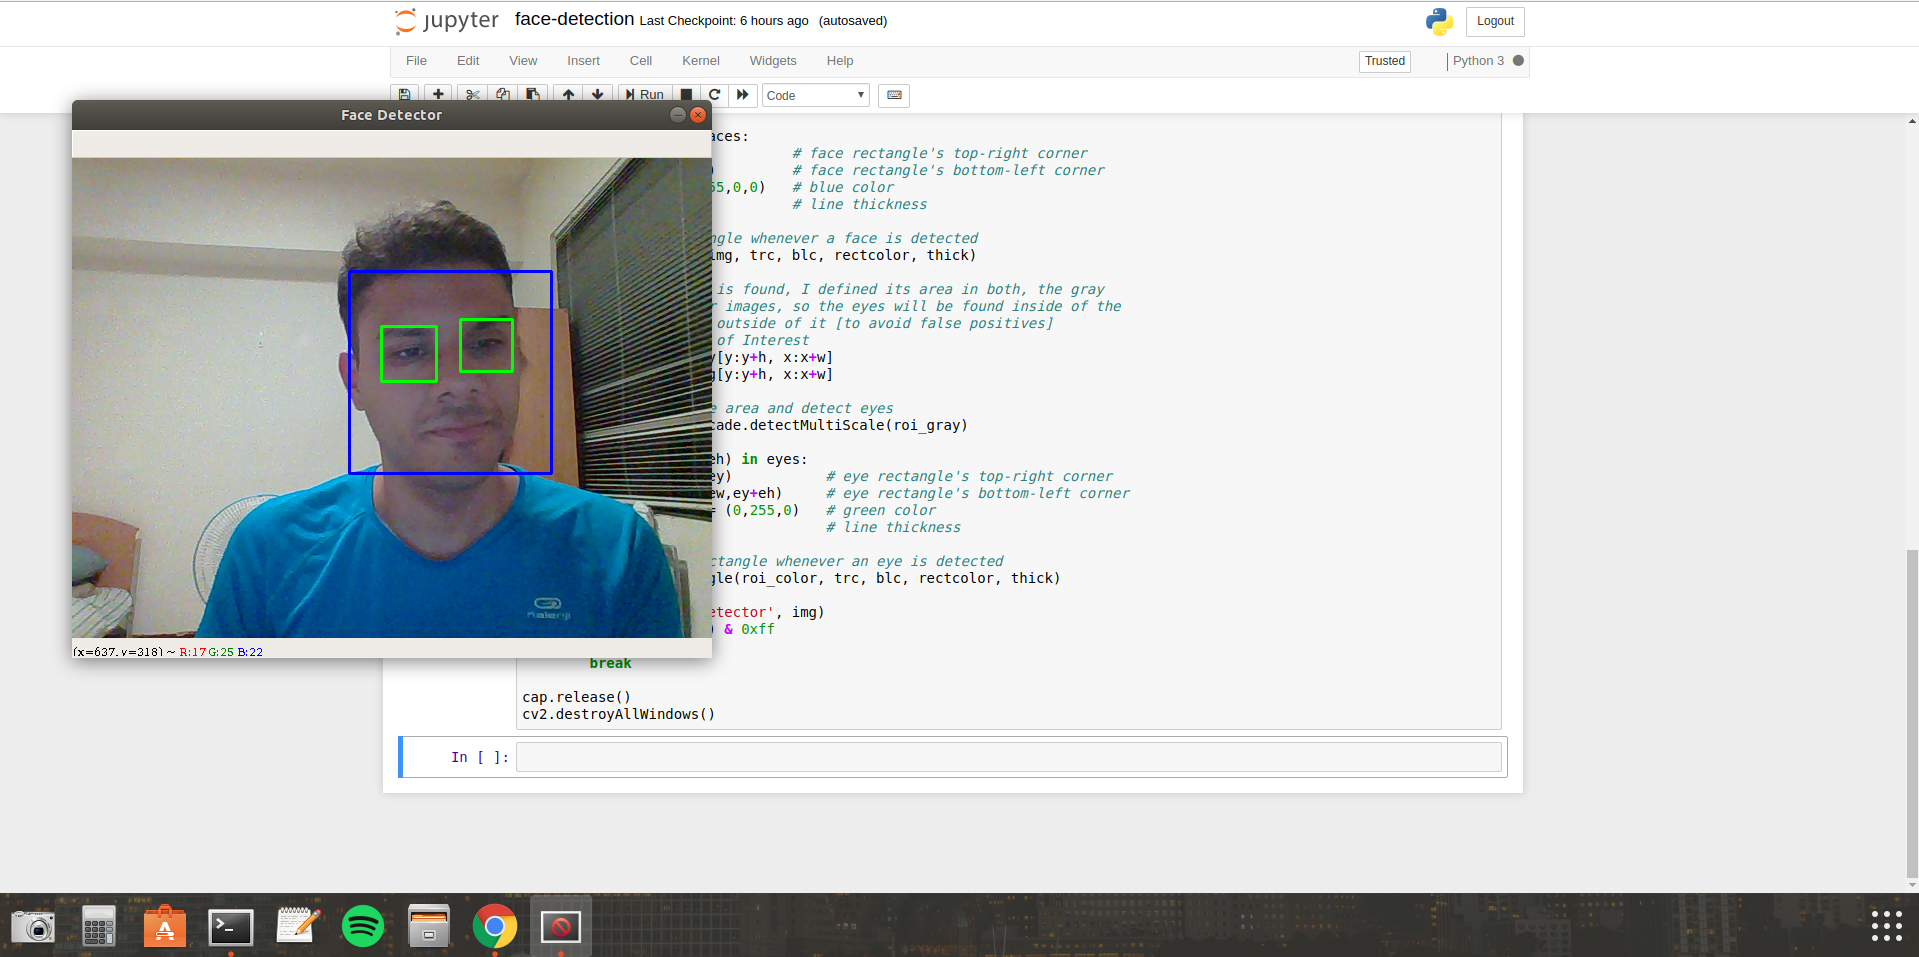

In [4]:
from IPython.display import Image
Image(filename='screenshot.png')